In [12]:
import tensorflow as tf
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import scikitplot as skplt

%matplotlib inline

In [13]:
def Data_Process():
    
    # Read the Dataset
    df = pd.concat(map(pd.read_csv, ["1_label.csv","2_label.csv","3_label.csv"]))

    col_norm =['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']
    
    # Normalization using Custom Lambda Function
    
    df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )
    
    X_Data = df1_norm
    Y_Data = df["label"]
    
    X_Data.head(20)
    Y_Data.head(20)

    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data,Y_Data, test_size=0.3,random_state=101)
    
    return X_Train, X_Test, Y_Train, Y_Test

In [14]:
def create_feature_column():
    
    feat_acc_x = tf.feature_column.numeric_column('acc_x')
    
    feat_acc_y = tf.feature_column.numeric_column('acc_y')
    
    feat_acc_z = tf.feature_column.numeric_column('acc_z')
    
    feat_gyr_x = tf.feature_column.numeric_column('gyr_x')
    
    feat_gyr_y = tf.feature_column.numeric_column('gyr_y')
    
    feat_gyr_z = tf.feature_column.numeric_column('gyr_z')
    
    feat_mag_x  = tf.feature_column.numeric_column('mag_x')
    
    feat_mag_y  = tf.feature_column.numeric_column('mag_y')
    
    feat_mag_z  = tf.feature_column.numeric_column('mag_z')
    
    feature_column = [feat_acc_x,feat_acc_y,feat_acc_z,feat_gyr_x,feat_gyr_y,feat_gyr_z,feat_mag_x,feat_mag_y,feat_mag_z  ] 
    
    return feature_column

In [15]:
X_Train, X_Test, Y_Train, Y_Test = Data_Process()
feature_column = create_feature_column()



input_func = tf.estimator.inputs.pandas_input_fn(X_Train, 
                                                 Y_Train,
                                                 batch_size=550,
                                                 num_epochs=1000,
                                                 shuffle=True)

eval_func = tf.estimator.inputs.pandas_input_fn(X_Test,
                                               Y_Test,
                                               batch_size=550,
                                               num_epochs=1,
                                               shuffle=False)
predict_input_fn = tf.estimator.inputs.pandas_input_fn(
      x=X_Test,
      num_epochs=1,
      shuffle=False)

In [16]:
dnnmodel = tf.estimator.DNNClassifier(
                                        hidden_units = [200,200],
                                        feature_columns = feature_column,
                                        n_classes=20,
                                        activation_fn=tf.nn.softmax,
                                        dropout=None,
                                        optimizer = tf.train.AdamOptimizer(learning_rate=0.1)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SOMEYA~1\\AppData\\Local\\Temp\\tmpg219cibc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000014CA489DA08>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [17]:
history = dnnmodel.train(input_fn=input_func, 
               steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SOMEYA~1\AppData\Local\Temp\tmpg219cibc\model.ckpt.
INFO:tensorflow:loss = 1650.3915, step = 1
INFO:tensorflow:global_step/sec: 49.9431
INFO:tensorflow:loss = 219.59056, step = 101 (2.013 sec)
INFO:tensorflow:global_step/sec: 42.065
INFO:tensorflow:loss = 176.35481, step = 201 (2.377 sec)
INFO:tensorflow:global_step/sec: 41.9907
INFO:tensorflow:loss = 197.22484, step = 301 (2.379 sec)
INFO:tensorflow:global_step/sec: 43.4504
INFO:tensorflow:loss = 194.71872, step = 401 (2.305 sec)
INFO:tensorflow:Saving checkpoints for 500 into C:\Users\SOMEYA~1\AppData\Local\Temp\tmpg219cibc\model.ckpt.
INFO:tensorflow:Loss for final step: 154.87637.


In [18]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-09-01T20:49:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SOMEYA~1\AppData\Local\Temp\tmpg219cibc\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-09-01-20:49:34
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.88914275, average_loss = 0.31779352, global_step = 500, loss = 174.77675
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\SOMEYA~1\AppData\Local\Temp\tmpg219cibc\model.ckpt-500


{'accuracy': 0.88914275,
 'average_loss': 0.31779352,
 'loss': 174.77675,
 'global_step': 500}

In [19]:
predictions = list(dnnmodel.predict(input_fn=predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test,prediction)
conmat = confusion_matrix(Y_Test,prediction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SOMEYA~1\AppData\Local\Temp\tmpg219cibc\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


C:\Users\SOMEYA KUMARI SHARMA\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

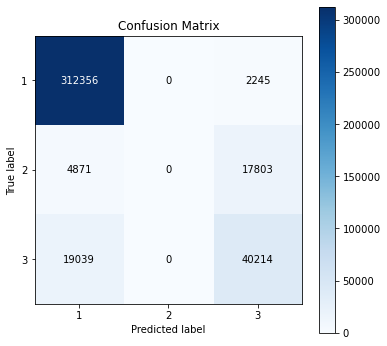

In [20]:
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                   figsize=(6,6),
                                   title="Confusion Matrix")

In [21]:
print(data)

              precision    recall  f1-score   support

           1       0.93      0.99      0.96    314601
           2       0.00      0.00      0.00     22674
           3       0.67      0.68      0.67     59253

    accuracy                           0.89    396528
   macro avg       0.53      0.56      0.54    396528
weighted avg       0.84      0.89      0.86    396528

